In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from warnings import simplefilter
simplefilter("ignore")


In [2]:
# Load Control and Test datasets
control = pd.read_csv(r"C:\Users\Aamir Shahzad\OneDrive\Desktop\Data Science Project\AB Testing Dataset\control_group.csv", sep=';')
test = pd.read_csv(r"C:\Users\Aamir Shahzad\OneDrive\Desktop\Data Science Project\AB Testing Dataset\test_group.csv", sep=';')


In [3]:
print(control.shape)
print(test.shape)

(30, 10)
(30, 10)


In [4]:
# Add group column
control['group'] = 'control'
test['group'] = 'treatment'

# Combine datasets
dataset = pd.concat([control, test], ignore_index=True)
dataset.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,group
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,control
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,control
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,control
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,control
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control


In [5]:
# Convert numeric columns
numeric_cols = ['Spend [USD]', '# of Impressions', 'Reach',
                '# of Website Clicks', '# of Searches',
                '# of View Content', '# of Add to Cart', '# of Purchase']

for col in numeric_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Convert Date column
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d.%m.%Y')

# Fill NaN with 0 for numeric columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(0)

# Check dataset info
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        60 non-null     object        
 1   Date                 60 non-null     datetime64[ns]
 2   Spend [USD]          60 non-null     int64         
 3   # of Impressions     60 non-null     float64       
 4   Reach                60 non-null     float64       
 5   # of Website Clicks  60 non-null     float64       
 6   # of Searches        60 non-null     float64       
 7   # of View Content    60 non-null     float64       
 8   # of Add to Cart     60 non-null     float64       
 9   # of Purchase        60 non-null     float64       
 10  group                60 non-null     object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 5.3+ KB


In [6]:
# Conversion Rate (CR)
dataset['Conversion Rate'] = dataset['# of Purchase'] / dataset['# of Website Clicks']

# Cost per Click (CPC)
dataset['Cost per Click'] = dataset['Spend [USD]'] / dataset['# of Website Clicks']

# Cost per Purchase (CPP)
dataset['Cost per Purchase'] = dataset['Spend [USD]'] / dataset['# of Purchase']

# Click-through Rate (CTR)
dataset['Click-through Rate'] = dataset['# of Website Clicks'] / dataset['# of Impressions']

# Handle divide by zero
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.fillna(0, inplace=True)

# Preview
dataset.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,group,Conversion Rate,Cost per Click,Cost per Purchase,Click-through Rate
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,control,0.088084,0.324971,3.689320,0.084835
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,control,0.063009,0.216646,3.438356,0.067003
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,control,0.057160,0.360018,6.298387,0.049411
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,control,0.110930,0.632953,5.705882,0.042057
4,Control Campaign,2019-08-05,1835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,control,0.000000,0.000000,0.000000,0.000000


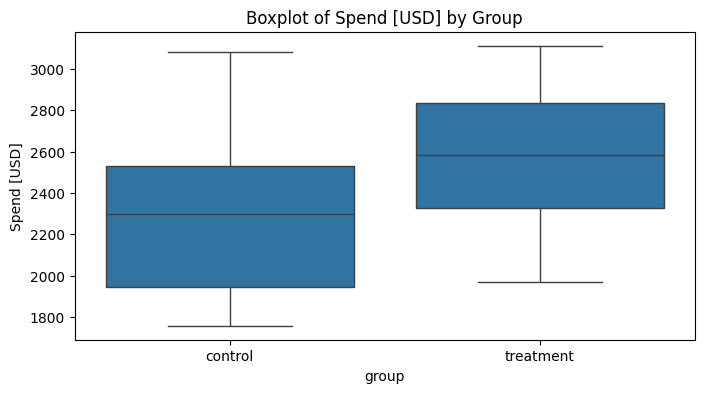

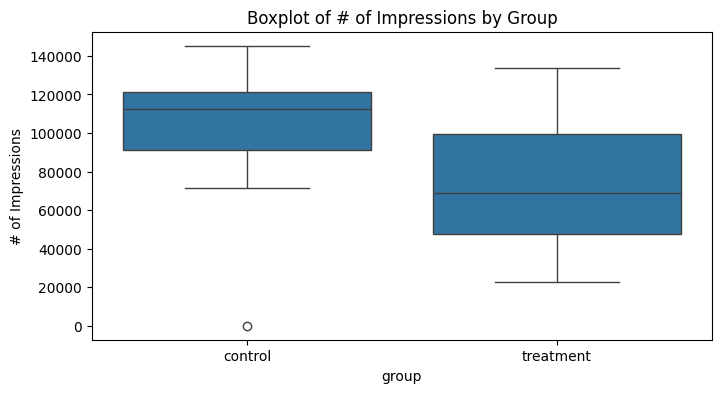

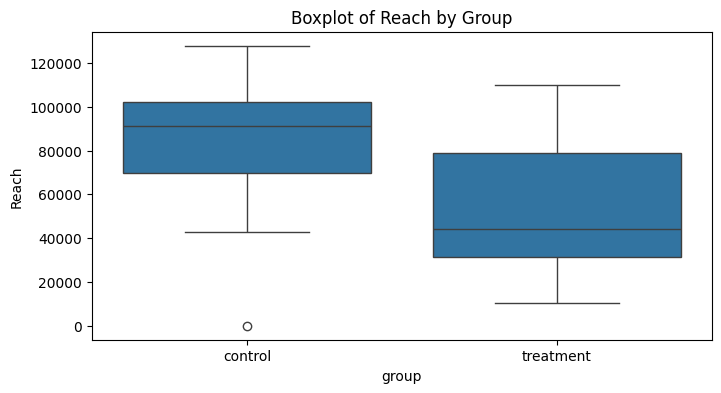

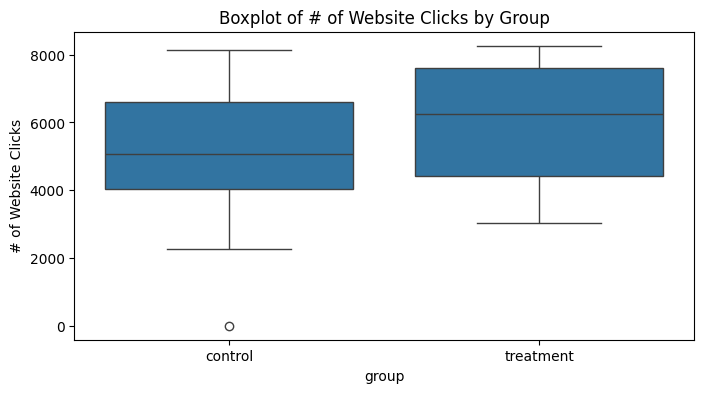

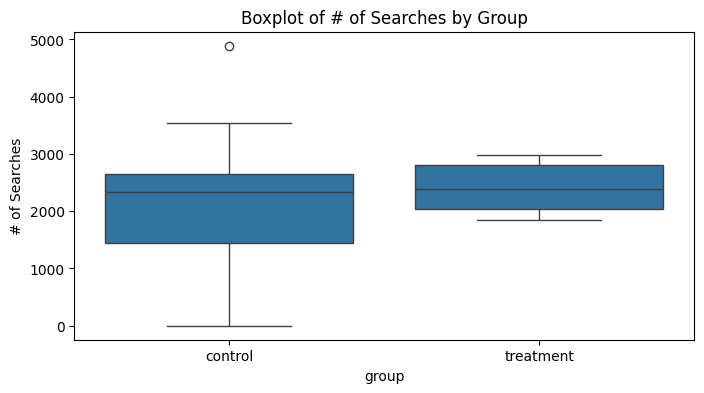

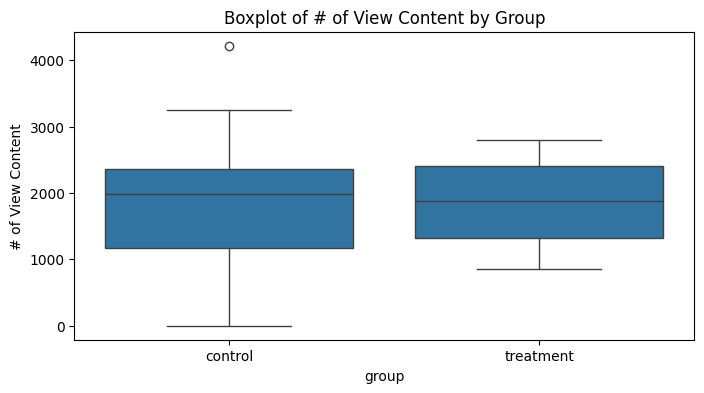

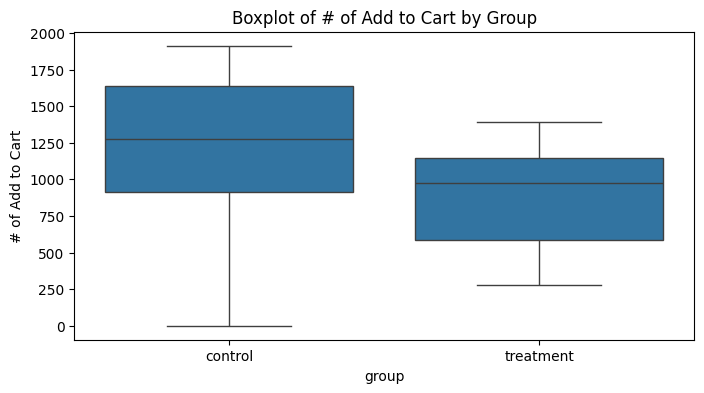

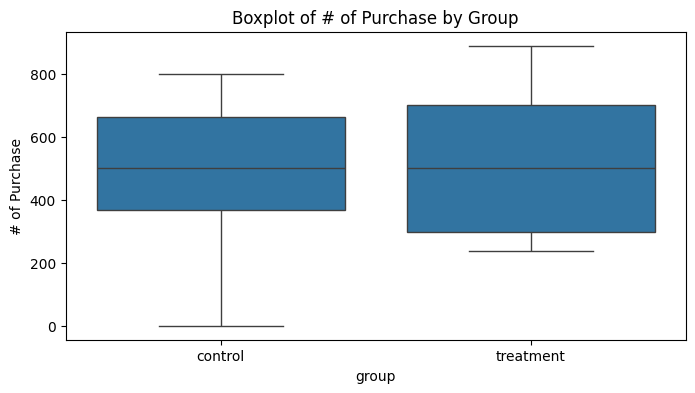

In [7]:
metrics = ['Spend [USD]', '# of Impressions', 'Reach',
           '# of Website Clicks', '# of Searches',
           '# of View Content', '# of Add to Cart', '# of Purchase']

for metric in metrics:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='group', y=metric, data=dataset)
    plt.title(f'Boxplot of {metric} by Group')
    plt.show()


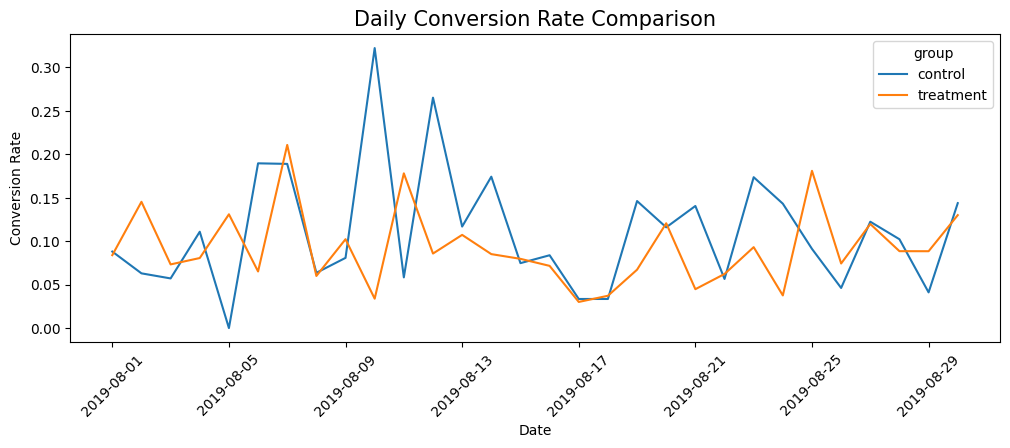

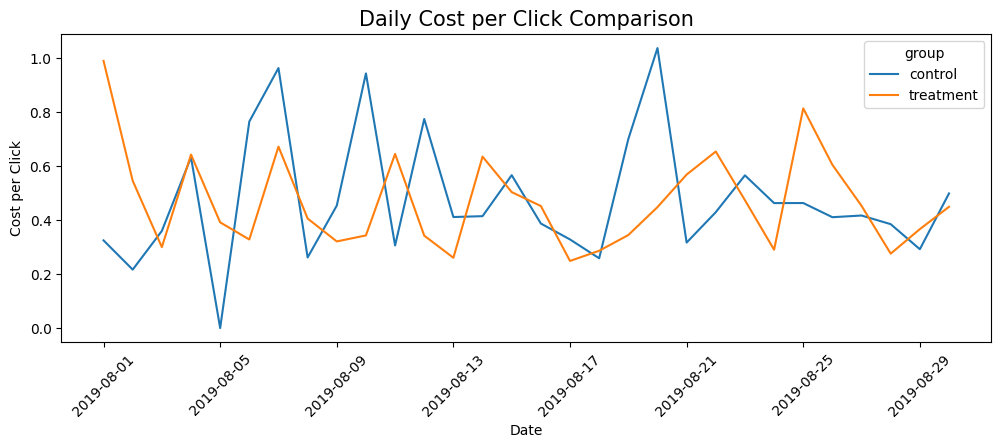

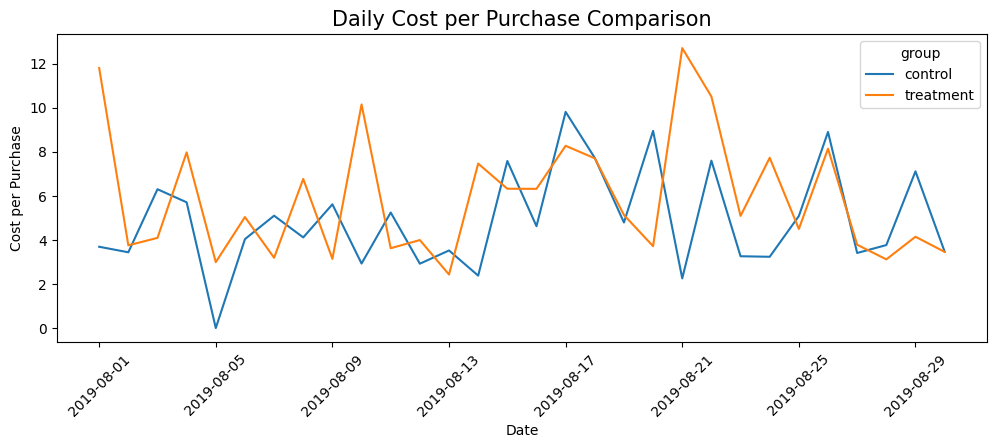

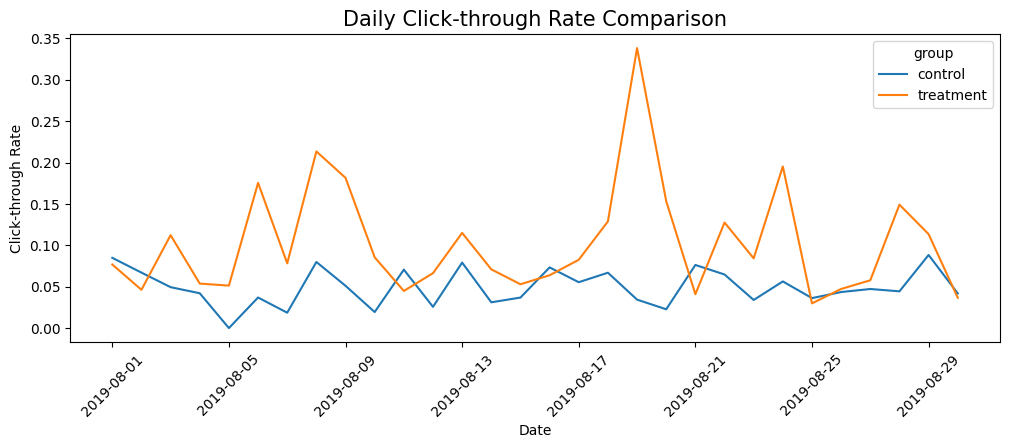

In [8]:
metrics_time = ['Conversion Rate','Cost per Click','Cost per Purchase','Click-through Rate']

for metric in metrics_time:
    plt.figure(figsize=(12,4))
    sns.lineplot(data=dataset, x='Date', y=metric, hue='group')
    plt.title(f'Daily {metric} Comparison', fontsize=15)
    plt.xticks(rotation=45)
    plt.show()


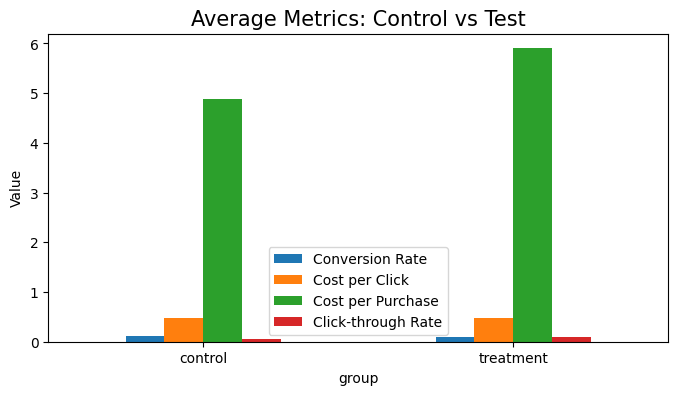

In [9]:
avg_metrics = dataset.groupby('group')[metrics_time].mean()
avg_metrics.plot(kind='bar', figsize=(8,4))
plt.title('Average Metrics: Control vs Test', fontsize=15)
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()


In [10]:
for metric in metrics_time:
    print(f"\n{metric}:")
    control_data = dataset[dataset['group']=='control'][metric]
    test_data = dataset[dataset['group']=='treatment'][metric]
    
    stat_c, p_c = shapiro(control_data)
    stat_t, p_t = shapiro(test_data)
    
    print(f"Control: Statistic={stat_c:.4f}, p-value={p_c:.4f}")
    print(f"Test: Statistic={stat_t:.4f}, p-value={p_t:.4f}")



Conversion Rate:
Control: Statistic=0.9220, p-value=0.0303
Test: Statistic=0.9255, p-value=0.0373

Cost per Click:
Control: Statistic=0.9230, p-value=0.0322
Test: Statistic=0.9114, p-value=0.0162

Cost per Purchase:
Control: Statistic=0.9527, p-value=0.1998
Test: Statistic=0.8966, p-value=0.0069

Click-through Rate:
Control: Statistic=0.9748, p-value=0.6774
Test: Statistic=0.8409, p-value=0.0004


In [11]:
for metric in metrics_time:
    control_data = dataset[dataset['group']=='control'][metric]
    test_data = dataset[dataset['group']=='treatment'][metric]
    
    levene_test = stats.levene(control_data, test_data)
    print(f"{metric}: Levene's Test Statistic={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")


Conversion Rate: Levene's Test Statistic=3.9372, p-value=0.0520
Cost per Click: Levene's Test Statistic=0.5588, p-value=0.4578
Cost per Purchase: Levene's Test Statistic=1.0778, p-value=0.3035
Click-through Rate: Levene's Test Statistic=9.2804, p-value=0.0035


In [12]:
for metric in metrics_time:
    control_data = dataset[dataset['group']=='control'][metric]
    test_data = dataset[dataset['group']=='treatment'][metric]
    
    t_stat, p_val = stats.ttest_ind(control_data, test_data)
    u_stat, u_pval = stats.mannwhitneyu(control_data, test_data)
    
    print(f"\n{metric}:")
    print(f"T-test: Statistic={t_stat:.4f}, P-value={p_val:.4f}")
    print(f"Mann-Whitney: Statistic={u_stat:.4f}, P-value={u_pval:.4f}")



Conversion Rate:
T-test: Statistic=1.2258, P-value=0.2252
Mann-Whitney: Statistic=503.0000, P-value=0.4376

Cost per Click:
T-test: Statistic=0.1798, P-value=0.8580
Mann-Whitney: Statistic=450.0000, P-value=1.0000

Cost per Purchase:
T-test: Statistic=-1.5416, P-value=0.1286
Mann-Whitney: Statistic=362.0000, P-value=0.1958

Click-through Rate:
T-test: Statistic=-4.0866, P-value=0.0001
Mann-Whitney: Statistic=193.0000, P-value=0.0001


In [13]:
# Initialize empty dictionary to store recommendation
recommendations = {}

for metric in metrics_time:
    control_data = dataset[dataset['group']=='control'][metric]
    test_data = dataset[dataset['group']=='treatment'][metric]

    # Use Mann-Whitney test (safe choice)
    u_stat, p_val = stats.mannwhitneyu(control_data, test_data)
    
    # Determine which group performed better
    avg_control = control_data.mean()
    avg_test = test_data.mean()
    
    if p_val < 0.05:
        better_group = 'test group' if avg_test > avg_control else 'control group'
        recommendations[metric] = f"Significant difference (p={p_val:.4f}). Better performer: {better_group}"
    else:
        recommendations[metric] = f"No significant difference (p={p_val:.4f})"

# Display recommendations
for metric, recommendation in recommendations.items():
    print(f"{metric}: {recommendation}")


Conversion Rate: No significant difference (p=0.4376)
Cost per Click: No significant difference (p=1.0000)
Cost per Purchase: No significant difference (p=0.1958)
Click-through Rate: Significant difference (p=0.0001). Better performer: test group
